In [ ]:
#3번과 동일하지만 dense layer만 사용한 신경만으로 회귀를 수행하라

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

df = pd.read_csv("./diabetes.csv", index_col=None)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
df.isnull().sum()
df = df.dropna()
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [3]:
X=df.drop(['Outcome','BMI'],axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,0.627,50
1,1,85,66,29,0,0.351,31
2,8,183,64,0,0,0.672,32
3,1,89,66,23,94,0.167,21
4,0,137,40,35,168,2.288,33


In [4]:
y=df['BMI']
y.value_counts()

BMI
32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
36.7     1
41.8     1
42.6     1
42.8     1
46.3     1
Name: count, Length: 248, dtype: int64

In [5]:
# 원 핫 인코딩
Y = pd.get_dummies(y).values

In [6]:
X = X.values

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [8]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((614, 7), (614, 248), (154, 7), (154, 248))

In [9]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(8,input_shape=(7,),activation='tanh'))
model.add(Dense(20,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

/opt/anaconda3/envs/school/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 465 (1.82 KB)

 Trainable params: 465 (1.82 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
N_EPOCHS = 10

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3021 - mse: 0.3021 - val_loss: 0.0092 - val_mse: 0.0092
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - loss: 0.0052 - mse: 0.0052 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - loss: 0.0052 - mse: 0.0052 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - loss: 0.0052 - mse: 0.0052 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - loss

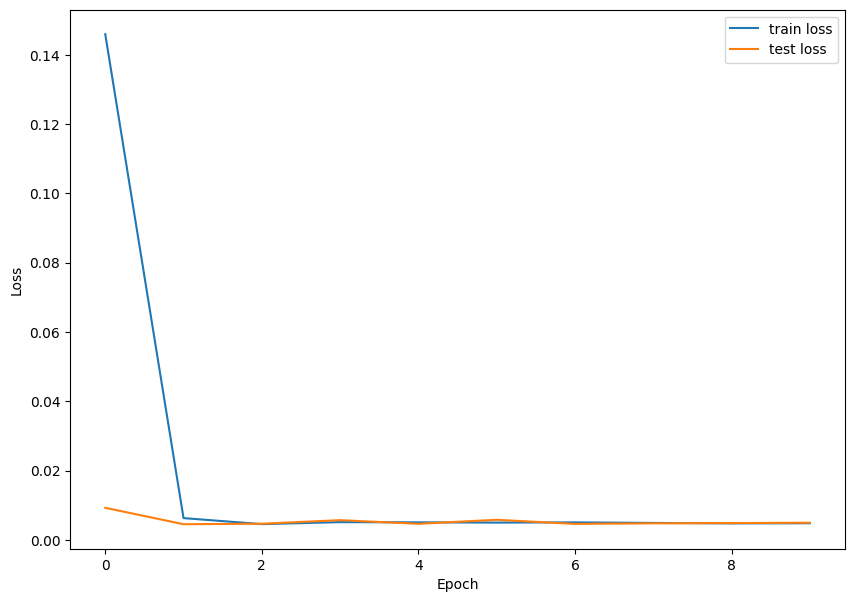

In [11]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - loss: 0.0050 - mse: 0.0050


[0.00492828618735075, 0.00492828618735075]